In [2]:
import numpy as np 
import keras
from keras import backend as K 
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
train_path = 'dataset/train'
valid_path = 'dataset/valid'
test_path = 'dataset/test'

In [4]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['0', '1','2','3','4'], batch_size=5)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['0', '1','2','3','4'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['0', '1','2','3','4'], batch_size=5)

Found 2100 images belonging to 5 classes.
Found 696 images belonging to 5 classes.
Found 900 images belonging to 5 classes.


In [5]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [6]:
imgs, labels = next(train_batches)

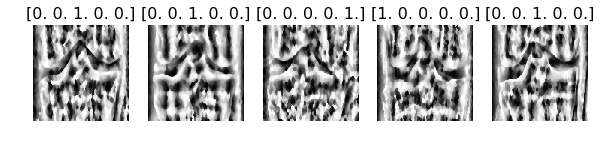

In [7]:
plots(imgs, titles=labels)

In [15]:
model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)),
        Flatten(),
        Dense(5, activation='softmax'),
    ])

In [16]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 7885445   
Total params: 7,886,341
Trainable params: 7,886,341
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit_generator(train_batches, steps_per_epoch=4, 
                    validation_data=valid_batches, validation_steps=4, epochs=30, verbose=2)

Epoch 1/30
4/4 - 0s - loss: 2796.5122 - accuracy: 0.2000 - val_loss: 1077.0991 - val_accuracy: 0.5625
Epoch 2/30
4/4 - 0s - loss: 841.1862 - accuracy: 0.4000 - val_loss: 796.4664 - val_accuracy: 0.4375
Epoch 3/30
4/4 - 0s - loss: 1155.5267 - accuracy: 0.1000 - val_loss: 1613.0698 - val_accuracy: 0.0625
Epoch 4/30
4/4 - 0s - loss: 708.1539 - accuracy: 0.2500 - val_loss: 610.0150 - val_accuracy: 0.1250
Epoch 5/30
4/4 - 0s - loss: 298.5596 - accuracy: 0.4000 - val_loss: 773.4834 - val_accuracy: 0.1875
Epoch 6/30
4/4 - 0s - loss: 983.3382 - accuracy: 0.3000 - val_loss: 871.9620 - val_accuracy: 0.0000e+00
Epoch 7/30
4/4 - 0s - loss: 553.5086 - accuracy: 0.0500 - val_loss: 1318.0393 - val_accuracy: 0.2500
Epoch 8/30
4/4 - 0s - loss: 654.7409 - accuracy: 0.3000 - val_loss: 1611.1497 - val_accuracy: 0.0000e+00
Epoch 9/30
4/4 - 0s - loss: 708.1152 - accuracy: 0.3500 - val_loss: 746.6053 - val_accuracy: 0.2500
Epoch 10/30
4/4 - 0s - loss: 391.4923 - accuracy: 0.4000 - val_loss: 634.3369 - val_ac

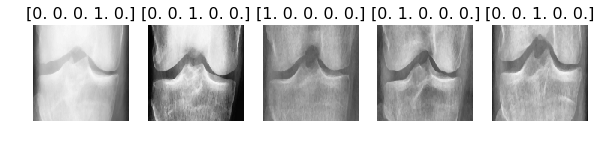

In [20]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [21]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 1., 0., 0.], dtype=float32)

In [23]:
predictions = model.predict(test_batches, steps=1, verbose=0)

In [28]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

TypeError: Singleton array 0 cannot be considered a valid collection.

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[3 0]
 [2 0]]


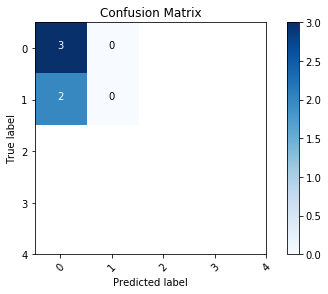

In [69]:
cm_plot_labels = ['0','1','2','3','4']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [ ]:
##############################################################################################################################################################################################################################

In [51]:
#model VGG16
vgg16_model = keras.applications.vgg16.VGG16()

In [52]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [53]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [54]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [36]:
#model.layers.pop() #remove last layer

In [45]:
#for layer in model.layers:
#    layer.trainable = False

In [56]:
model.add(Dense(5, activation='softmax'))

In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [58]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
model.fit(train_batches, steps_per_epoch=4, 
                    validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
4/4 - 22s - loss: 2.7729 - accuracy: 0.4000 - val_loss: 2.4950 - val_accuracy: 0.0000e+00
Epoch 2/5
4/4 - 17s - loss: 2.0569 - accuracy: 0.3000 - val_loss: 2.3893 - val_accuracy: 0.0625
Epoch 3/5
4/4 - 18s - loss: 2.1652 - accuracy: 0.2000 - val_loss: 1.6598 - val_accuracy: 0.2500
Epoch 4/5
4/4 - 17s - loss: 2.1281 - accuracy: 0.1500 - val_loss: 1.9856 - val_accuracy: 0.0625
Epoch 5/5
4/4 - 19s - loss: 1.9292 - accuracy: 0.3500 - val_loss: 2.3819 - val_accuracy: 0.0625


In [60]:
model.save('MyModel.h5')

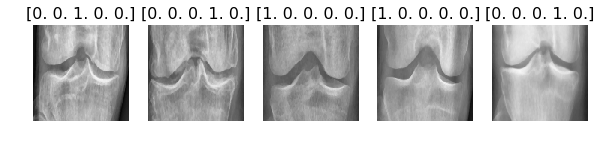

In [61]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [62]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 1., 1., 0.], dtype=float32)

In [65]:
predictions = model.predict(test_batches, steps=1, verbose=0)

In [72]:
predictions

array([[0.15500458, 0.1710668 , 0.02628751, 0.42365816, 0.22398302],
       [0.15847039, 0.1733034 , 0.02692589, 0.41319692, 0.22810341],
       [0.16063741, 0.17733619, 0.02808422, 0.41466433, 0.21927792],
       [0.16128632, 0.17583671, 0.02828275, 0.41424403, 0.22035022],
       [0.16480234, 0.18302953, 0.03031594, 0.40286055, 0.21899164]],
      dtype=float32)

In [71]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

array([[3, 0],
       [2, 0]], dtype=int64)

Confusion matrix, without normalization
[[3 0]
 [2 0]]


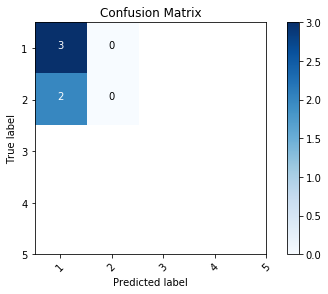

In [70]:
cm_plot_labels = ['1','2','3','4','5']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

HI
